In [1]:
sys.path.append("..")
import os
import utils
import plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils
import pandas as pd
import matplotlib.dates as mdates
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

## General functions

In [2]:
def prepare_regional_data(data):
    m,n,r = data.shape
    out_arr = np.column_stack((np.repeat(np.arange(m),n),data.reshape(m*n,-1)))
    out_df = pd.DataFrame(out_arr)
    out_df['week'] = out_df.index % data.shape[1]
    out_df = out_df.rename(columns={0:'simulation'})
    out_df['simulation'] = out_df['simulation'].astype(int)
    out_df.set_index(['simulation', 'week'], inplace=True)
    return out_df

# Spatial Plotting

## Prepare data

In [3]:
# Read data and generate parameters
paths = utils.create_named_tuple('paths', 'filepaths.txt')
config = utils.create_named_tuple('config', paths.config)
age_labels = utils.generate_labels_from_bins(config.age_bins)
population = utils.generate_custom_population(config.age_bins, age_labels)

In [4]:
# generate geodatefram for plotting
gdf = utils.generate_geopandas(population, paths.municipalities_geo)

In [6]:
# Infection policy
(age_labels,
            vaccines_available, 
            flow_scale,
            contact_weights,
            S_regions_inf,
            I_regions_inf,
            new_infected_regions_inf,
            new_deaths_regions_inf,
            V_regions_inf,
            S_age_groups,
            I_age_groups,
            new_infected_age_groups,
            new_deaths_age_groups,
            vaccinated_age_groups,
            dates) = utils.read_csv('results/100_simulations_fhi_policy_2021_06_03_18_18_16')
X = np.insert(np.diff(V_regions_inf, axis=1), 0, 0, axis=1) # Need to this on vaccines since the first week is deleted when taking the difference of V for each week
df_x_regions_inf = prepare_regional_data(X)

Reading results ..
100%|██████████| 100/100 [00:00<00:00, 102.58it/s]


In [ ]:
# Susceptible policy
(age_labels,
            vaccines_available, 
            flow_scale,
            contact_weights,
            S_regions_sus,
            I_regions_sus,
            new_infected_regions_sus,
            new_deaths_regions_sus,
            V_regions_sus,
            S_age_groups,
            I_age_groups,
            new_infected_age_groups,
            new_deaths_age_groups,
            vaccinated_age_groups,
            dates) = utils.read_csv('results/5_simulations_susceptible_based_2021_06_02_13_42_31')
X = np.insert(np.diff(V_regions_sus, axis=1), 0, 0, axis=1)
df_x_regions_sus = prepare_regional_data(X)

In [22]:
# FHI policy
(age_labels,
    vaccines_available, 
    flow_scale,
    contact_weights,
    S_regions_fhi,
    I_regions_fhi,
    new_infected_regions_fhi,
    new_deaths_regions_fhi,
    V_regions_fhi,
    S_age_groups,
    I_age_groups,
    new_infected_age_groups,
    new_deaths_age_groups,
    vaccinated_age_groups,
    dates) = utils.read_csv('results/100_simulations_fhi_policy_2021_06_03_18_18_16')
X = np.insert(np.diff(V_regions_fhi, axis=1), 0, 0, axis=1)
df_x_regions_fhi = prepare_regional_data(X)

Reading results ..
100%|██████████| 100/100 [00:01<00:00, 97.10it/s]


In [28]:
# Infected
df_I_regions = prepare_regional_data(I_regions_inf)

In [29]:
data = {'Infected-policy': df_x_regions_inf, 'Susceptible-policy': df_x_regions_sus, 'Symptomatic-Infected': df_I_regions}

In [251]:
data['Infected-policy']

1           2            3            4    \
simulation week                                                      
0          0        0.000000    0.000000     0.000000     0.000000   
           1        0.000000    0.000000     0.000000     0.000000   
           2        0.000000    0.000000     0.000000     0.000000   
           3        0.000000    0.000000     0.000000     0.000000   
           4        0.000000    0.000000     0.000000     0.000000   
...                      ...         ...          ...          ...   
4          70    4250.221593  840.293172  2298.995043  2473.663260   
           71    5218.394012    0.000000  2382.093708  2694.894500   
           72    5038.097654    0.000000  2359.930051  2928.116208   
           73    5426.590414    0.000000  2308.978230  2907.763377   
           74    5577.031246    0.000000  3134.014978  2682.658072   

                         5             6    7             8            9    \
simulation week                                                              
0          0        0.000000  0.000000e+00  0.0  0.000000e+00     0.000000   
           1        0.000000  0.000000e+00  0.0  0.000000e+00     0.000000   
           2        0.000000  0.000000e+00  0.0  0.000000e+00     0.000000   
           3        0.000000  0.000000e+00  0.0  0.000000e+00     0.000000   
           4        0.000000  0.000000e+00  0.0  0.000000e+00     0.000000   
...                      ...           ...  ...           ...          ...   
4          70    2086.832248  7.105342e-06  0.0  6.223968e-08  1124.546951   
           71    2366.446063  2.048472e-06  0.0  1.794365e-08    29.052862   
           72    2229.068311  5.205836e-07  0.0  4.561343e-09     0.000000   
           73    2967.734212  1.337608e-07  0.0  1.169838e-09     0.000000   
           74    2845.132458  3.738410e-08  0.0  3.274181e-10     0.000000   

                         10   ...  347       348           349           350  \
simulation week               ...                                              
0          0        0.000000  ...  0.0  0.000000  0.000000e+00  0.000000e+00   
           1        0.000000  ...  0.0  0.000000  0.000000e+00  0.000000e+00   
           2        0.000000  ...  0.0  0.000000  0.000000e+00  0.000000e+00   
           3        0.000000  ...  0.0  0.000000  0.000000e+00  0.000000e+00   
           4        0.000000  ...  0.0  0.000000  0.000000e+00  0.000000e+00   
...                      ...  ...  ...       ...           ...           ...   
4          70    1019.405610  ...  0.0  0.000911  1.243876e-10  4.714929e-23   
           71     914.032351  ...  0.0  0.000263  3.586820e-11  1.654361e-23   
           72     573.562583  ...  0.0  0.000067  9.098500e-12  0.000000e+00   
           73       0.000000  ...  0.0  0.000017  2.327027e-12  0.000000e+00   
           74       0.000000  ...  0.0  0.000005  6.359357e-13  0.000000e+00   

                 351           352          353       354  355  356  
simulation week                                                      
0          0     0.0  0.000000e+00     0.000000  0.000000  0.0  0.0  
           1     0.0  0.000000e+00     0.000000  0.000000  0.0  0.0  
           2     0.0  0.000000e+00     0.000000  0.000000  0.0  0.0  
           3     0.0  0.000000e+00     0.000000  0.000000  0.0  0.0  
           4     0.0  0.000000e+00     0.000000  0.000000  0.0  0.0  
...              ...           ...          ...       ...  ...  ...  
4          70    0.0  1.410593e-35   377.661669  0.000257  0.0  0.0  
           71    0.0  6.394689e-36   534.774701  0.000074  0.0  0.0  
           72    0.0  0.000000e+00  1027.143099  0.000019  0.0  0.0  
           73    0.0  0.000000e+00   100.342231  0.000005  0.0  0.0  
           74    0.0  0.000000e+00     0.000000  0.000001  0.0  0.0  

[375 rows x 356 columns]

## Plot

In [35]:
plt.style.use('seaborn-ticks')
simulations = [0] # simulation starts at 0
weeks = [45, 70, 72] # weeks starts at 1
policies = list(data.keys())
max_images_on_one_row = 2
nrows=1
ncols=3

for sim in simulations:
    for week in weeks:
        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12*ncols,12*nrows), sharex=True)
        col = 0 
        for i, value in enumerate(policies):
            x = data[value].loc[(sim,week)]
            x.index -= 1
            gdf[value] = x
            ax = axs[col]
            if value == 'Symptomatic-Infected':
                gdf.plot(ax=ax, column=value, facecolor='white', edgecolor='black', alpha=1, linewidth=0.1, zorder=2, cmap='Reds', legend=True, vmin=0,vmax=50)
            else:
                gdf[value+'_percentage'] = gdf[value]/gdf['population']
                gdf.plot(ax=ax, column=value+'_percentage', facecolor='white', edgecolor='black', alpha=1, linewidth=0.1, zorder=2, cmap='Blues', legend=True, vmin=0,vmax=0.2)
            ax.axis('off')
            col += 1
        plt.draw()
        plt.savefig(f"../plots/computational_study/regional_development/sim_{sim}_week_{week}.jpg", dpi=fig.dpi, bbox_inches = 'tight')
        plt.close()

## Prepare Data

# Historical Plotting

In [23]:
# Load data
df = pd.read_csv('../data/waves/world_daily_cases.csv')
df = df[df.country == "Norway"].fillna(0)
df

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
63969,2020-2-15,Norway,0.0,0.0,0.0,0.0,0.0
63970,2020-2-16,Norway,0.0,0.0,0.0,0.0,0.0
63971,2020-2-17,Norway,0.0,0.0,0.0,0.0,0.0
63972,2020-2-18,Norway,0.0,0.0,0.0,0.0,0.0
63973,2020-2-19,Norway,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
64399,2021-4-20,Norway,108587.0,559.0,18926.0,709.0,0.0
64400,2021-4-21,Norway,109137.0,550.0,19451.0,734.0,25.0
64401,2021-4-22,Norway,109581.0,444.0,19894.0,735.0,1.0
64402,2021-4-23,Norway,110061.0,480.0,20373.0,736.0,1.0


In [24]:
# Calculate percentiles
percentile_limit=90

new_deaths_all_age_groups = np.sum(new_deaths_age_groups, axis=2)
new_infected_all_age_groups =  np.sum(new_infected_age_groups, axis=2)

deaths_cumulative = new_deaths_all_age_groups.cumsum(axis=1)
deaths_mean = new_deaths_all_age_groups.mean(axis=0)
deaths_mean_cumulative = deaths_cumulative.mean(axis=0)
u_percentile_deaths = np.percentile(new_deaths_all_age_groups, percentile_limit, axis=0)
l_percentile_deaths = np.percentile(new_deaths_all_age_groups, 100-percentile_limit, axis=0)
u_percentile_deaths_cum = np.percentile(deaths_cumulative, percentile_limit, axis=0)
l_percentile_deaths_cum = np.percentile(deaths_cumulative, 100-percentile_limit, axis=0)

infected_cumulative = new_infected_all_age_groups.cumsum(axis=1)
infected_mean = new_infected_all_age_groups.mean(axis=0)
infected_mean_cumulative = infected_cumulative.mean(axis=0)
u_percentile_infected = np.percentile(new_infected_all_age_groups, percentile_limit, axis=0)
l_percentile_infected = np.percentile(new_infected_all_age_groups, 100-percentile_limit, axis=0)
u_percentile_infected_cum = np.percentile(infected_cumulative, percentile_limit, axis=0)
l_percentile_infected_cum = np.percentile(infected_cumulative, 100-percentile_limit, axis=0)

In [25]:
deaths_cumulative.shape

(100, 38)

## Plot cases - average

In [19]:
# Define colours
colors = sns.color_palette('Set2')
color_1 = 1
color_2 = 2

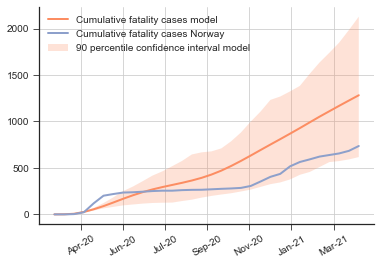

In [35]:
plt.style.use('seaborn-ticks')
restrict_to_real_data_length = True
max_weeks_real_data = 32
fig, ax = plt.subplots(1)

if restrict_to_real_data_length:
    ax.plot(dates[:max_weeks_real_data], deaths_mean_cumulative[:max_weeks_real_data], lw=2, label='Cumulative fatality cases model', color=colors[color_1])
    ax.plot(dates[:max_weeks_real_data], df.cumulative_total_deaths.to_numpy(dtype=int)[:max_weeks_real_data*14:14], lw=2, label='Cumulative fatality cases Norway', color=colors[color_2])
    ax.fill_between(dates[:max_weeks_real_data], u_percentile_deaths_cum[:max_weeks_real_data], l_percentile_deaths_cum[:max_weeks_real_data], facecolor=colors[color_1], alpha=0.25, label='90 percentile confidence interval model')

else:
    ax.plot(dates[:-1], deaths_mean_cumulative[:-1], lw=2, label='Cumulative fatality cases model', color=colors[color_1])
    ax.plot(dates[:max_weeks_real_data], df.cumulative_total_deaths.to_numpy(dtype=int)[:max_weeks_real_data*14:14], lw=2, label='Cumulative fatality cases Norway', color=colors[color_2])
    ax.fill_between(dates, u_percentile_deaths_cum, l_percentile_deaths_cum, facecolor=colors[color_1], alpha=0.25, label='90 percentile confidence interval model')

ax.legend(loc='upper left')
# Format the date into months & days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y')) 
# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60)) 
# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid()
#fig.savefig("../plots/computational_study/norwegian_numbers_comparison/mean_match_deaths.png", bbox_inches='tight', dpi=150)

## Plot deaths - average

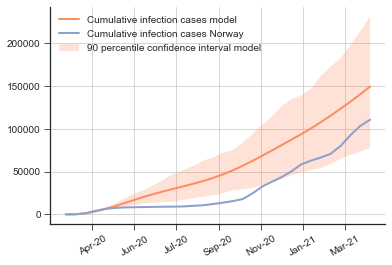

In [37]:
plt.style.use('seaborn-ticks')
restrict_to_real_data_length = True
max_weeks_real_data = 32
sim = 1 

fig, ax = plt.subplots(1)
#ax.plot(dates, deaths_mean, lw=2, label='Deaths model', color='blue')
if restrict_to_real_data_length:
    ax.plot(dates[:max_weeks_real_data], infected_mean_cumulative[:max_weeks_real_data], lw=2, label='Cumulative infection cases model', color=colors[color_1])
    ax.fill_between(dates[:max_weeks_real_data], u_percentile_infected_cum[:max_weeks_real_data], l_percentile_infected_cum[:max_weeks_real_data], facecolor=colors[1], alpha=0.25, label='90 percentile confidence interval model')
    ax.plot(dates[:max_weeks_real_data], df.cumulative_total_cases.to_numpy(dtype=int)[:max_weeks_real_data*14:14], lw=2, label='Cumulative infection cases Norway', color=colors[color_2])
else:
    ax.plot(dates[:-1], infected_mean_cumulative[:-1], lw=2, label='Cumulative infection cases model', color=colors[color_1])
    ax.fill_between(dates, u_percentile_infected_cum, l_percentile_infected_cum, facecolor=colors[color_1], alpha=0.25, label='90 percentile confidence interval model')
    ax.plot(dates[:max_weeks_real_data], df.cumulative_total_cases.to_numpy(dtype=int)[:max_weeks_real_data*14:14], lw=2, label='Cumulative infection cases Norway', color=colors[color_2])

#ax.set_title(r'Cumulative and new infected per week')
ax.legend(loc='upper left')
# Format the date into months & days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y')) 
# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60)) 
# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation =30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid()
#fig.savefig("../plots/computational_study/norwegian_numbers_comparison/mean_match_cases.png", bbox_inches='tight', dpi=150)

## Plot cases - single

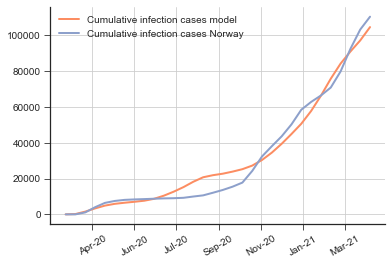

In [55]:
plt.style.use('seaborn-ticks')
restrict_to_real_data_length = True
max_weeks_real_data = 32
sim = 16  # Good case:2, Bad case: 0

fig, ax = plt.subplots(1)
#ax.plot(dates, deaths_mean, lw=2, label='Deaths model', color='blue')
if restrict_to_real_data_length:
    ax.plot(dates[:max_weeks_real_data], infected_cumulative[sim][:max_weeks_real_data], lw=2, label='Cumulative infection cases model', color=colors[color_1])
    ax.plot(dates[:max_weeks_real_data], df.cumulative_total_cases.to_numpy(dtype=int)[:max_weeks_real_data*14:14], lw=2, label='Cumulative infection cases Norway', color=colors[color_2])
else:
    ax.plot(dates[:-1], infected_cumulative[sim][:-1], lw=2, label='Cumulative infection cases model', color=colors[color_1])
    ax.plot(dates[:max_weeks_real_data], df.cumulative_total_cases.to_numpy(dtype=int)[:max_weeks_real_data*14:14], lw=2, label='Cumulative infection cases Norway', color=colors[color_2])

#ax.set_title(r'Cumulative and new infected per week')
ax.legend(loc='upper left')
# Format the date into months & days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y')) 
# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60)) 
# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid()
#fig.savefig("../plots/computational_study/norwegian_numbers_comparison/good_match_cases.png", bbox_inches='tight', dpi=150)

## Plot deaths - single

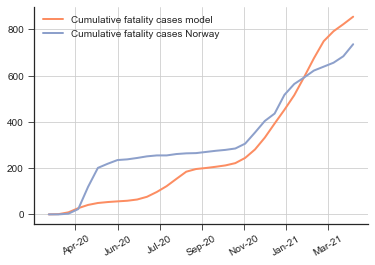

In [57]:
plt.style.use('seaborn-ticks')
restrict_to_real_data_length = True
max_weeks_real_data = 32
simulation = 16

fig, ax = plt.subplots(1)
if restrict_to_real_data_length:
    ax.plot(dates[:max_weeks_real_data], deaths_cumulative[simulation][:max_weeks_real_data], lw=2, label='Cumulative fatality cases model', color=colors[color_1])
    ax.plot(dates[:max_weeks_real_data], df.cumulative_total_deaths.to_numpy(dtype=int)[:max_weeks_real_data*14:14], lw=2, label='Cumulative fatality cases Norway', color=colors[color_2])

else:
    ax.plot(dates[:-1], deaths_cumulative[simulation][:-1], lw=2, label='Cumulative fatality cases model', color=colors[color_1])
    ax.plot(dates[:max_weeks_real_data], df.cumulative_total_deaths.to_numpy(dtype=int)[:max_weeks_real_data*14:14], lw=2, label='Cumulative fatality cases Norway', color=colors[color_2])

ax.legend(loc='upper left')
# Format the date into months & days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y')) 
# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60)) 
# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation =30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid()
#fig.savefig("../plots/computational_study/norwegian_numbers_comparison/good_match_deaths.png", bbox_inches='tight', dpi=150)

In [147]:
dates = dates[:max_weeks_real_data]
dates

0    2020-02-24
1    2020-03-02
2    2020-03-09
3    2020-03-16
4    2020-03-23
        ...    
58   2021-04-05
59   2021-04-12
60   2021-04-19
61   2021-04-26
62   2021-05-03
Name: date, Length: 63, dtype: datetime64[ns]

In [325]:
# Load data
df = pd.read_csv('../data/infected_municipalities_covidnorway.csv')
df = df[['date', 'kommune_no', 'kommune_name', 'cases']]
df['date'] =  pd.to_datetime(df['date'])
df['week'] = df['date'].dt.isocalendar().week
df['year'] = df['date'].dt.isocalendar().year
f1 = df['kommune_no'] != 9998 
f2 = df['kommune_no'] != 9999
df = df[f1 & f2]
df

,date,kommune_no,kommune_name,cases,week,year
0,2020-03-26,301,Oslo,67,13,2020
1,2020-03-26,301,Oslo,59,13,2020
2,2020-03-26,301,Oslo,47,13,2020
3,2020-03-26,301,Oslo,33,13,2020
4,2020-03-26,301,Oslo,67,13,2020
...,...,...,...,...,...,...
166215,2021-06-03,5440,Berlevåg,4,22,2021
166216,2021-06-03,5441,Tana,5,22,2021
166217,2021-06-03,5442,Nesseby,2,22,2021
166218,2021-06-03,5443,Båtsfjord,11,22,2021


In [327]:
# resample_dict ={'date':'first', 'kommune_no':'first', 'kommune_name':'first', 'cases':'sum'}
resample_dict ={'cases':'sum'}
df2 = df.groupby(['year', 'week', 'kommune_no']).agg(resample_dict)
# start_date = df2.loc[(2020, 13, 301)].date
# df2 = df2['cases'].reset_index()
df2 = df2.reset_index()
df2

,year,week,kommune_no,cases
0,2020,13,301,3752
1,2020,13,1101,30
2,2020,13,1103,370
3,2020,13,1106,182
4,2020,13,1108,147
...,...,...,...,...
22423,2021,22,5440,16
22424,2021,22,5441,20
22425,2021,22,5442,8
22426,2021,22,5443,44


In [329]:
df['week'] = np.where(df['year'] > 2020, df['First Season'], df['First Season'])

ValueError: operands could not be broadcast together with shapes (165354,) (22428,) (22428,) 

In [310]:
a3d = np.array(df2)
a3d.shape

(22428, 1)

In [297]:
a3d = np.array(list(pdf.groupby('a').apply(pd.DataFrame.as_matrix)))

NameError: name 'pdf' is not defined

In [288]:
df2.loc[(2020, 13, 301)].date

Timestamp('2020-03-26 00:00:00')